Used dataset from [kaggle.com/imdevskp/corona-virus-report](https://www.kaggle.com/imdevskp/corona-virus-report)<br>
Results of an analogous project: [life-xl.com/covid19.php](https://life-xl.com/covid19.php)

In [1]:
import pandas as pd
import datetime
%matplotlib inline

PATH_DB = '/media/l3m/LinuxFilesBig/1-datasets/COVID-19/'

In [2]:
# Load data in Notepad
data = pd.read_csv(PATH_DB+'COVID-19_kaggle_db.csv', parse_dates=['Date'])
data.head(3)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2,0,0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2,0,0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0,0,0


<br>

### Prepare data

In [3]:
# remove redundant columns
data.drop(['Province/State', 'Lat', 'Long',], axis=1, inplace=True)

# rename column for convenience
data.rename(columns={'Country/Region':'Country'}, inplace=True)

print(data.shape)
data.head(3)

(18056, 5)


,Country,Date,Confirmed,Deaths,Recovered
0,Thailand,2020-01-22,2,0,0
1,Japan,2020-01-22,2,0,0
2,Singapore,2020-01-22,0,0,0


In [4]:
# combine data from different provinces, so show data only per countries

data = data.groupby(['Country', 'Date']) \
           .agg({'Confirmed': 'sum',
                 'Deaths': 'sum',
                 'Recovered': 'sum'}) \
           .reset_index()

print(data.shape)
data.head(3)

(10431, 5)


,Country,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0


In [5]:
# summarize data for world
data_world = data.groupby('Date') \
                 .agg({'Country': lambda x: '_WORLD',
                       'Date': lambda x: x.iloc[0],
                       'Confirmed': 'sum',
                       'Deaths': 'sum',
                       'Recovered': 'sum'}).reset_index(drop=True)

data_world

,Country,Date,Confirmed,Deaths,Recovered
0,_WORLD,2020-01-22,554,17,28
1,_WORLD,2020-01-23,652,18,30
2,_WORLD,2020-01-24,939,26,36
3,_WORLD,2020-01-25,1432,42,39
4,_WORLD,2020-01-26,2113,56,52
...,...,...,...,...,...
56,_WORLD,2020-03-18,214910,8733,83207
57,_WORLD,2020-03-19,242708,9867,84854
58,_WORLD,2020-03-20,272166,11299,87256
59,_WORLD,2020-03-21,304524,12973,91499


In [6]:
data = pd.concat([data, data_world]).reset_index(drop=True)

data

,Country,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0
...,...,...,...,...,...
10487,_WORLD,2020-03-18,214910,8733,83207
10488,_WORLD,2020-03-19,242708,9867,84854
10489,_WORLD,2020-03-20,272166,11299,87256
10490,_WORLD,2020-03-21,304524,12973,91499


<br>

### Countries with the highest numbers of confirmed cases

In [7]:
# Create additional DataFrame, containing only information about total cases

total_cases = data.groupby('Country').apply(lambda gr: gr.iloc[-1]).reset_index(drop=True) 
                                                                  # .set_index(pd.Index(range(1,163)))

total_cases

,Country,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-03-22,40,1,1
1,Albania,2020-03-22,89,2,2
2,Algeria,2020-03-22,201,17,65
3,Andorra,2020-03-22,113,1,1
4,Angola,2020-03-22,2,0,0
...,...,...,...,...,...
167,Venezuela,2020-03-22,70,0,15
168,Vietnam,2020-03-22,113,0,17
169,Zambia,2020-03-22,3,0,0
170,Zimbabwe,2020-03-22,3,0,0


In [8]:
total_cases.sort_values(by='Confirmed', ascending=False, inplace=True)
total_cases.reset_index(drop=True, inplace=True)

# Show total statistics for world and countries with the highest numbers of confirmed cases
total_cases.head(21)

,Country,Date,Confirmed,Deaths,Recovered
0,_WORLD,2020-03-22,335955,14632,97704
1,China,2020-03-22,81397,3265,72362
2,Italy,2020-03-22,59138,5476,7024
3,US,2020-03-22,33272,417,0
4,Spain,2020-03-22,28768,1772,2575
5,Germany,2020-03-22,24873,94,266
6,Iran,2020-03-22,21638,1685,7931
7,France,2020-03-22,16176,674,2206
8,South Korea,2020-03-22,8897,104,2909
9,Switzerland,2020-03-22,7245,98,131


<br>

### Create a table revealing of new cases

In [9]:
# Till now DataFrame contains total number of cases.
# Change it to the number of new cases per day (calculate it as difference b/w neighbouring rows)
data_dynamics = pd.concat([data[['Country', 'Date']], data[['Confirmed', 'Deaths', 'Recovered']].diff()],
                          axis='columns') \
                  .reset_index(drop=True)

print(data_dynamics.shape)
data_dynamics.head(3)

(10492, 5)


,Country,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,NaN,NaN,NaN
1,Afghanistan,2020-01-23,0.0,0.0,0.0
2,Afghanistan,2020-01-24,0.0,0.0,0.0


In [10]:
# Now the first row (earliest day of observatopm) for each country contains garbage.
# So, delete the earliest data for each country

def delete_earliest_data(gr):
    gr.drop(gr.index[0], inplace=True)
    return gr
    
data_dynamics = data_dynamics.groupby(['Country']) \
                             .apply(delete_earliest_data) \
                             .reset_index(drop=True)

# Correct type of some columns back to int
data_dynamics[['Confirmed', 'Deaths', 'Recovered']] = \
    data_dynamics[['Confirmed', 'Deaths', 'Recovered']].astype('int')

print(data_dynamics.shape)
data_dynamics.head(3)

(10320, 5)


,Country,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-23,0,0,0
1,Afghanistan,2020-01-24,0,0,0
2,Afghanistan,2020-01-25,0,0,0


<br>

### Create graphs

In [11]:
def extract_df(df_overall, country_name=None, last_date=datetime.datetime.now(), number_of_days=90):
    """Extract from overall DataFrame sub-DataFrame according given limitations.
    
    :df_overall:     overall (big) DataFrame
    :country_name:   name of country
    :last_date:      last date till that the graph will be shown
    :number_of_days: number of days in the graph
    :return:         sub-DateFrame
    """
    first_date = last_date + datetime.timedelta(days=-number_of_days+1)

    if country_name:
        sub_df = df_overall[(df_overall['Country'] == country_name) &
                            (df_overall['Date'] >= first_date) &
                            (df_overall['Date'] <= last_date)]
    else:
        sub_df = df_overall[(df_overall['Date'] >= first_date) &
                            (df_overall['Date'] <= last_date)]

    return sub_df    

In [12]:
def build_graph(df):

    df.index = df['Date'].dt.strftime('%b-%d')
    

    df['Confirmed'].plot(kind='bar', width=1,
                         color=['#C07800', '#D0810F'], figsize=(20,6), fontsize=14)
    
    return None

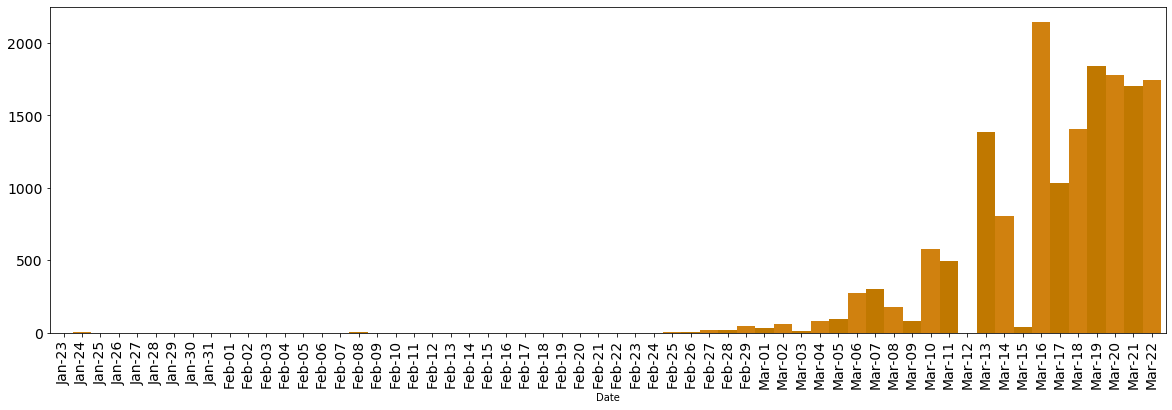

In [13]:
# Build graph for a separate country.
# Set country, the last day of shown results, and the number of days for showing
country_name = 'France'
last_date = data['Date'].max()  # last_date = datetime.datetime(2020, 3, 20)
number_of_days = 300

country_graph = extract_df(data_dynamics, country_name, last_date, number_of_days)

build_graph(country_graph)

In [14]:
# test
country_graph

,Country,Date,Confirmed,Deaths,Recovered
Date,,,,,
Jan-23,France,2020-01-23,0,0,0
Jan-24,France,2020-01-24,2,0,0
Jan-25,France,2020-01-25,1,0,0
Jan-26,France,2020-01-26,0,0,0
Jan-27,France,2020-01-27,0,0,0
Jan-28,France,2020-01-28,1,0,0
Jan-29,France,2020-01-29,1,0,0
Jan-30,France,2020-01-30,0,0,0
Jan-31,France,2020-01-31,0,0,0


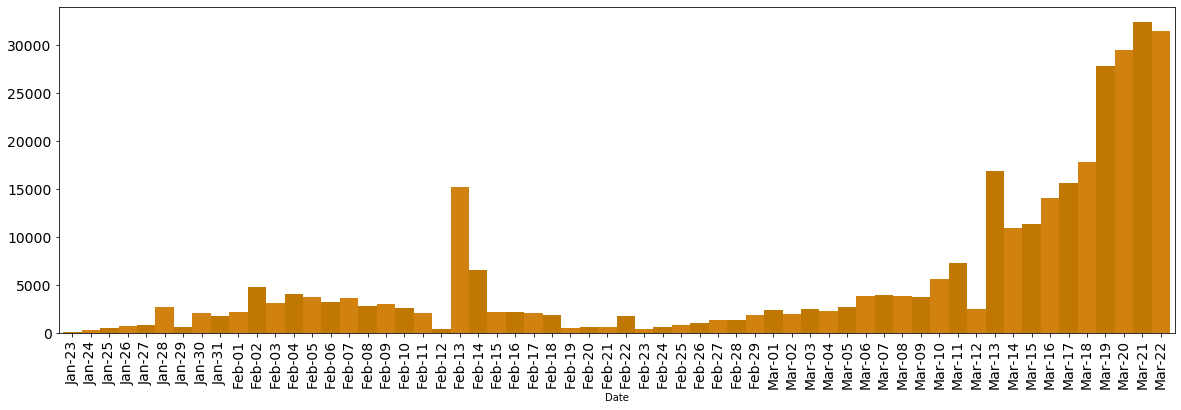

In [15]:
# build graph for the world

last_date = data['Date'].max()  # last_date = datetime.datetime(2020, 3, 20)
number_of_days = 300

world_graph = extract_df(data_dynamics, '_WORLD', last_date, number_of_days)

build_graph(world_graph)

In [16]:
# test
world_graph

,Country,Date,Confirmed,Deaths,Recovered
Date,,,,,
Jan-23,_WORLD,2020-01-23,98,1,2
Jan-24,_WORLD,2020-01-24,287,8,6
Jan-25,_WORLD,2020-01-25,493,16,3
Jan-26,_WORLD,2020-01-26,681,14,13
Jan-27,_WORLD,2020-01-27,809,26,9
Jan-28,_WORLD,2020-01-28,2651,49,46
Jan-29,_WORLD,2020-01-29,588,2,19
Jan-30,_WORLD,2020-01-30,2068,38,17
Jan-31,_WORLD,2020-01-31,1691,42,79


<br>

### Create soothed graphs

We can see in the graphs that occasionally a day of high revealing of infection adjoins with a day of low revealing. I suggest to soothe the table, taking for each day an average value between three adjacent days.

In [17]:
def soothe_df(df):
    
    def soothe_column_values(column):
        ls = list(column)
        lng = len(ls)

        soothed_values = [] 
        
        soothed_values.append(round((ls[0]*2 + ls[1]) / 3, 2))
        soothed_values.extend([round((ls[i-1] + ls[i] + ls[i+1]) / 3, 2) for i in range(1, lng-1)])
        soothed_values.append(round((ls[lng-2] + ls[lng-1]*2) / 3, 2))
    
        return soothed_values

    df_soothed = df.copy()
    for col_name in ['Confirmed', 'Deaths', 'Recovered']:
        df_soothed[col_name] = soothe_column_values(df_soothed[col_name])
        
    return df_soothed

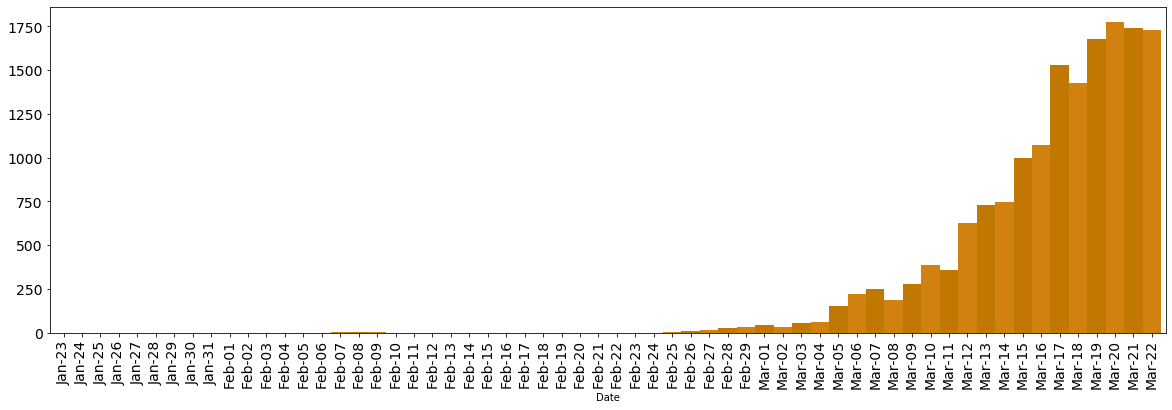

In [18]:
# Create soothed graph for a separate country
country_name = 'France'
last_date = data['Date'].max()  # last_date = datetime.datetime(2020, 3, 20)
number_of_days = 300

country_soothed = soothe_df(extract_df(data_dynamics, country_name, last_date, number_of_days))

build_graph(country_soothed)

In [19]:
# test
country_soothed

,Country,Date,Confirmed,Deaths,Recovered
Date,,,,,
Jan-23,France,2020-01-23,0.67,0.00,0.00
Jan-24,France,2020-01-24,1.00,0.00,0.00
Jan-25,France,2020-01-25,1.00,0.00,0.00
Jan-26,France,2020-01-26,0.33,0.00,0.00
Jan-27,France,2020-01-27,0.33,0.00,0.00
Jan-28,France,2020-01-28,0.67,0.00,0.00
Jan-29,France,2020-01-29,0.67,0.00,0.00
Jan-30,France,2020-01-30,0.33,0.00,0.00
Jan-31,France,2020-01-31,0.33,0.00,0.00


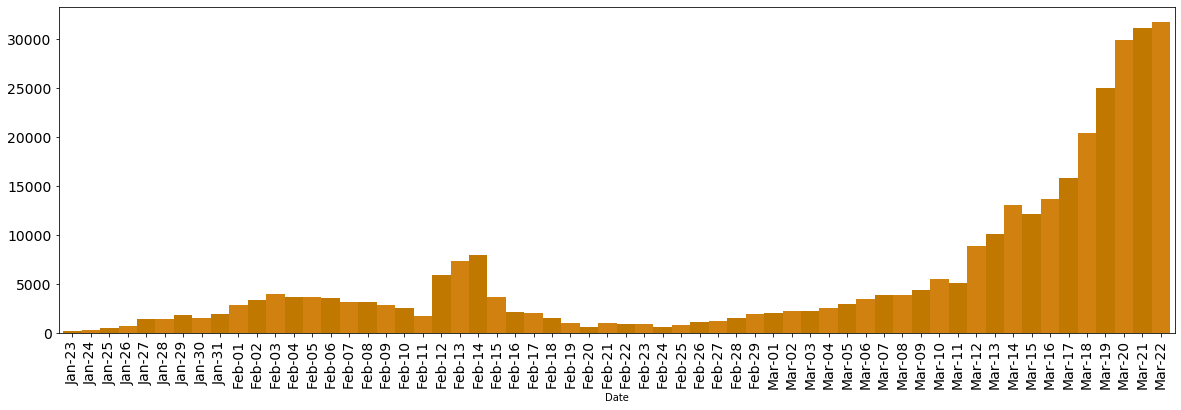

In [20]:
# Create soothed graph for the world
last_date = data['Date'].max()  # last_date = datetime.datetime(2020, 3, 20)
number_of_days = 300

world_soothed = soothe_df(extract_df(data_dynamics, '_WORLD', last_date, number_of_days))

build_graph(world_soothed)

In [21]:
# test
world_soothed

,Country,Date,Confirmed,Deaths,Recovered
Date,,,,,
Jan-23,_WORLD,2020-01-23,161.00,3.33,3.33
Jan-24,_WORLD,2020-01-24,292.67,8.33,3.67
Jan-25,_WORLD,2020-01-25,487.00,12.67,7.33
Jan-26,_WORLD,2020-01-26,661.00,18.67,8.33
Jan-27,_WORLD,2020-01-27,1380.33,29.67,22.67
Jan-28,_WORLD,2020-01-28,1349.33,25.67,24.67
Jan-29,_WORLD,2020-01-29,1769.00,29.67,27.33
Jan-30,_WORLD,2020-01-30,1449.00,27.33,38.33
Jan-31,_WORLD,2020-01-31,1956.33,42.00,52.67


<br>

### Comparison of several countries

In [22]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 8)  # plt.rc('figure', figsize=(20, 6))
plt.rcParams['font.size'] = 14            # plt.rc('font', size=14)

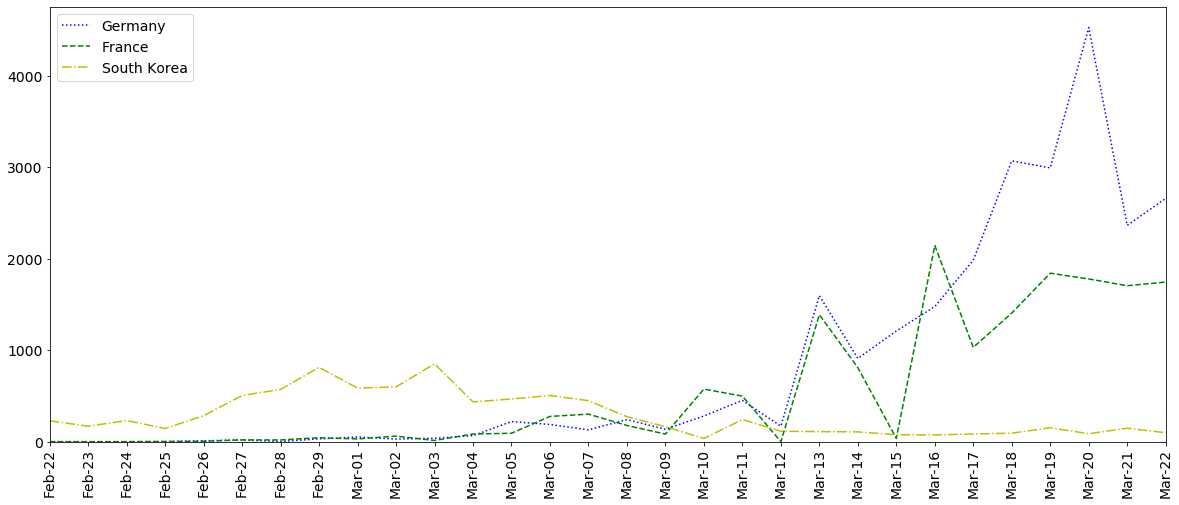

In [23]:
# for original rough data
countries = ['Germany', 'France', 'South Korea']

last_date = data['Date'].max()  # last_date = datetime.datetime(2020, 3, 20)
number_of_days = 30

styles = ['b:', 'g--', 'y-.', 'r-.', 'm:', 'b--', 'c--']

for i, country_name in enumerate(countries):
    country_graph = extract_df(data_dynamics, country_name, last_date, number_of_days)
    plt.plot(country_graph['Date'].dt.strftime('%b-%d'), country_graph['Confirmed'],
             styles[i], label=country_name)

plt.margins(x=0)
plt.ylim(0)

plt.xticks(rotation='vertical')
plt.legend(loc='upper left')

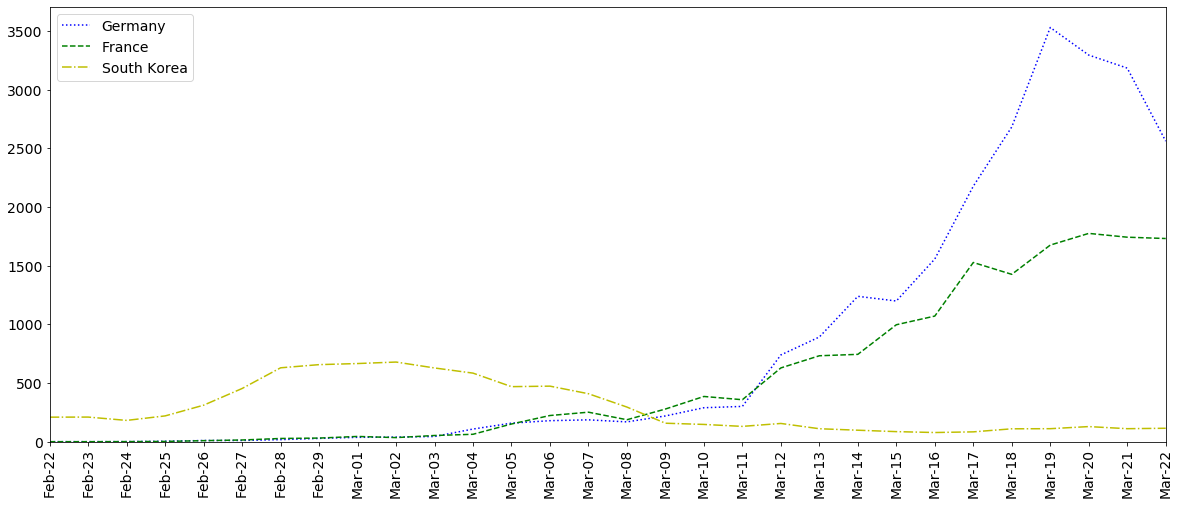

In [24]:
# for smoothed data
countries = ['Germany', 'France', 'South Korea']

last_date = data['Date'].max()  # last_date = datetime.datetime(2020, 3, 20)
number_of_days = 30

styles = ['b:', 'g--', 'y-.', 'r-.', 'm:', 'b--', 'c--']

for i, country_name in enumerate(countries):
    country_graph = extract_df(data_dynamics, country_name, last_date, number_of_days)
    southed_graph = soothe_df(country_graph)
    plt.plot(southed_graph['Date'].dt.strftime('%b-%d'), southed_graph['Confirmed'],
             styles[i], label=country_name)

plt.margins(x=0)
plt.ylim(0)

plt.xticks(rotation='vertical')
plt.legend(loc='upper left')